In [1]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# custom libs
from mlrefined_libraries import unsupervised_library as unsuplib
from mlrefined_libraries import basics_library as baslib
datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

In [31]:
from sklearn.cluster import KMeans

# Normalization schemes

Load in dataset.

In [2]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/'
data = np.loadtxt(datapath + 'mnist_mini_train.csv',delimiter = ',')

# divy up data into images and labels
images = data[:,:-1].T
labels = data[:,-1]

Now plot a few images - make sure to adjsut color map to plot correctly (and not their negatives).

In [11]:
def show_images(X):
    '''
    Function for plotting input images, stacked in columns of input X.
    '''
    # plotting mechanism taken from excellent answer from stack overflow: https://stackoverflow.com/questions/20057260/how-to-remove-gaps-between-subplots-in-matplotlib
    plt.figure(figsize = (8,3))
    gs1 = gridspec.GridSpec(5, 14)
    gs1.update(wspace=0, hspace=0.05) # set the spacing between axes. 
    
    # shape of square version of image
    square_shape = int((X.shape[0])**(0.5))

    for i in range(min(70,X.shape[1])):
        # plot image in panel
        ax = plt.subplot(gs1[i])
        im = ax.imshow(255 - np.reshape(X[:,i],(square_shape,square_shape)),cmap = 'gray')

        # clean up panel
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    plt.show()

# PCA vs ZCA whitening for an image

Now perform PCA on entire stack of 5,000 random MNIST images.  We then visualize the result.  Then we will whiten and plot.

In [22]:
# mean-center the data
X = unsuplib.PCA_functionality.contrast_normalize(images)

In [24]:
# ZCA sphere data
W,S,Z = unsuplib.PCA_functionality.ZCA_sphere(X)

Plot each of these types of images.

<IPython.core.display.Javascript object>


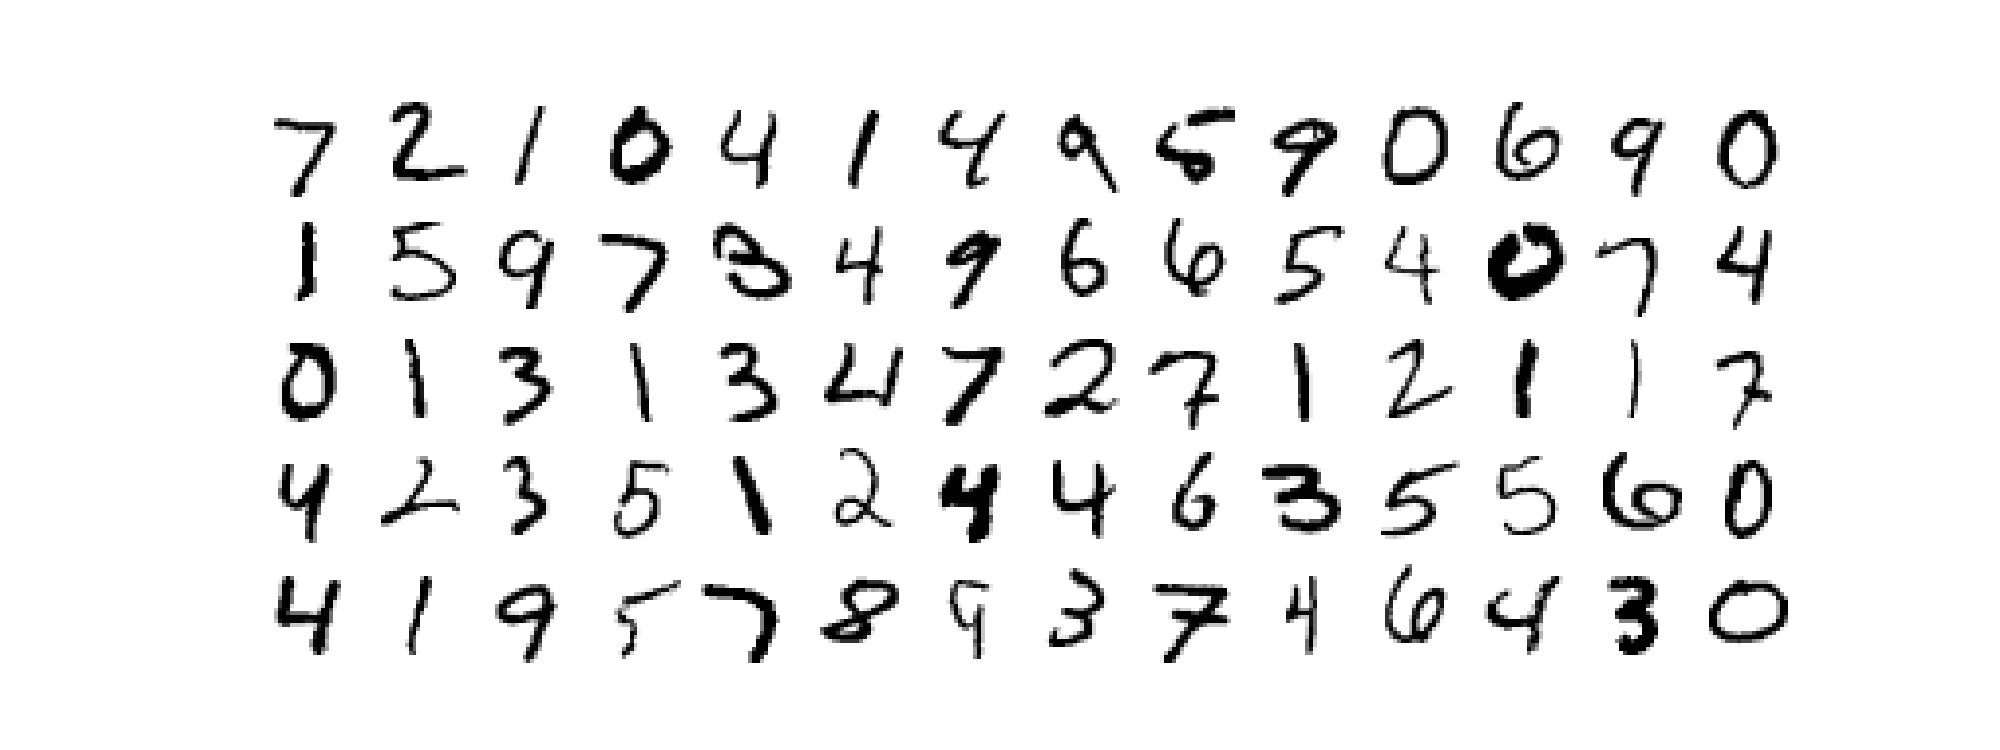

In [23]:
# plot original images
show_images(X)

<IPython.core.display.Javascript object>


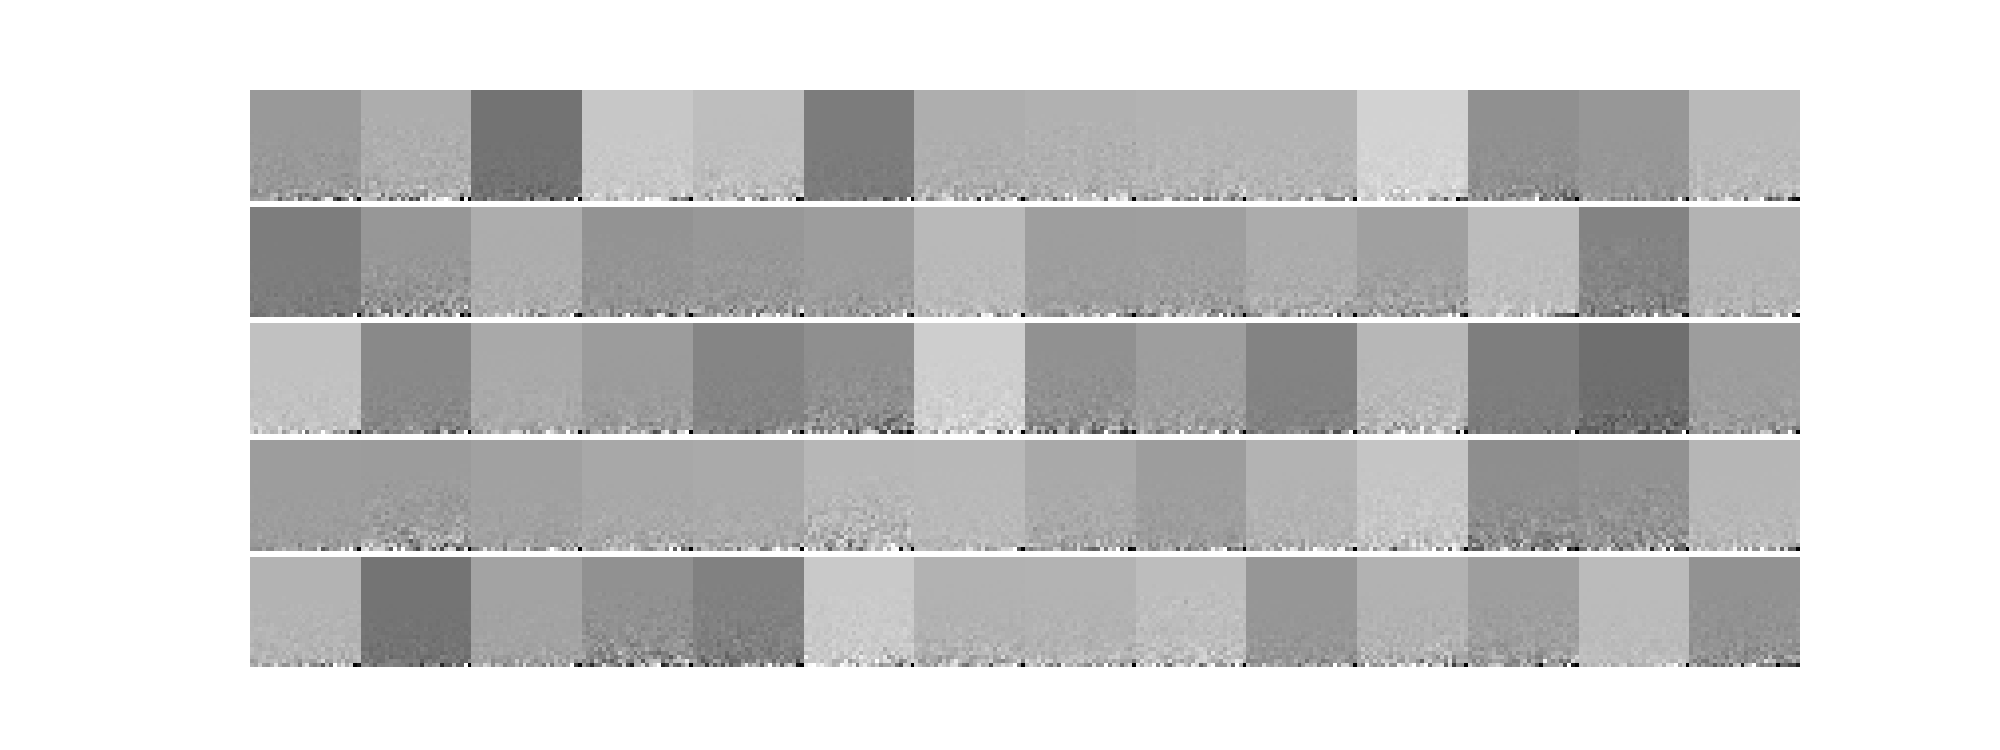

In [25]:
# plot PCA rotated images
show_images(W)

<IPython.core.display.Javascript object>


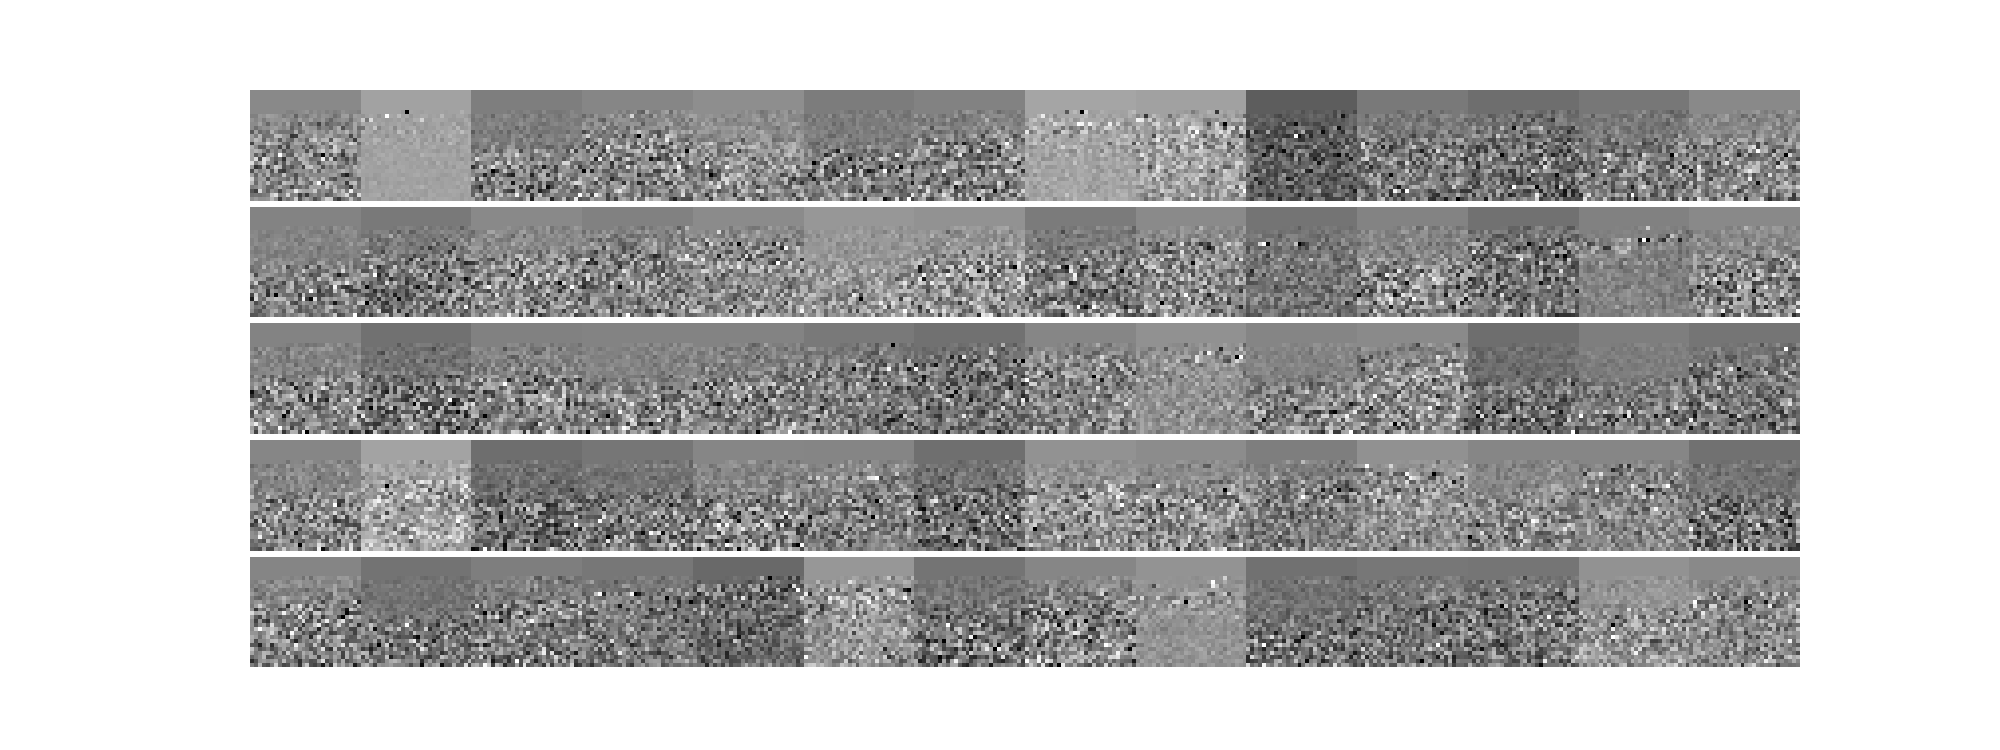

In [26]:
# plot PCA-sphered data
show_images(S)

<IPython.core.display.Javascript object>


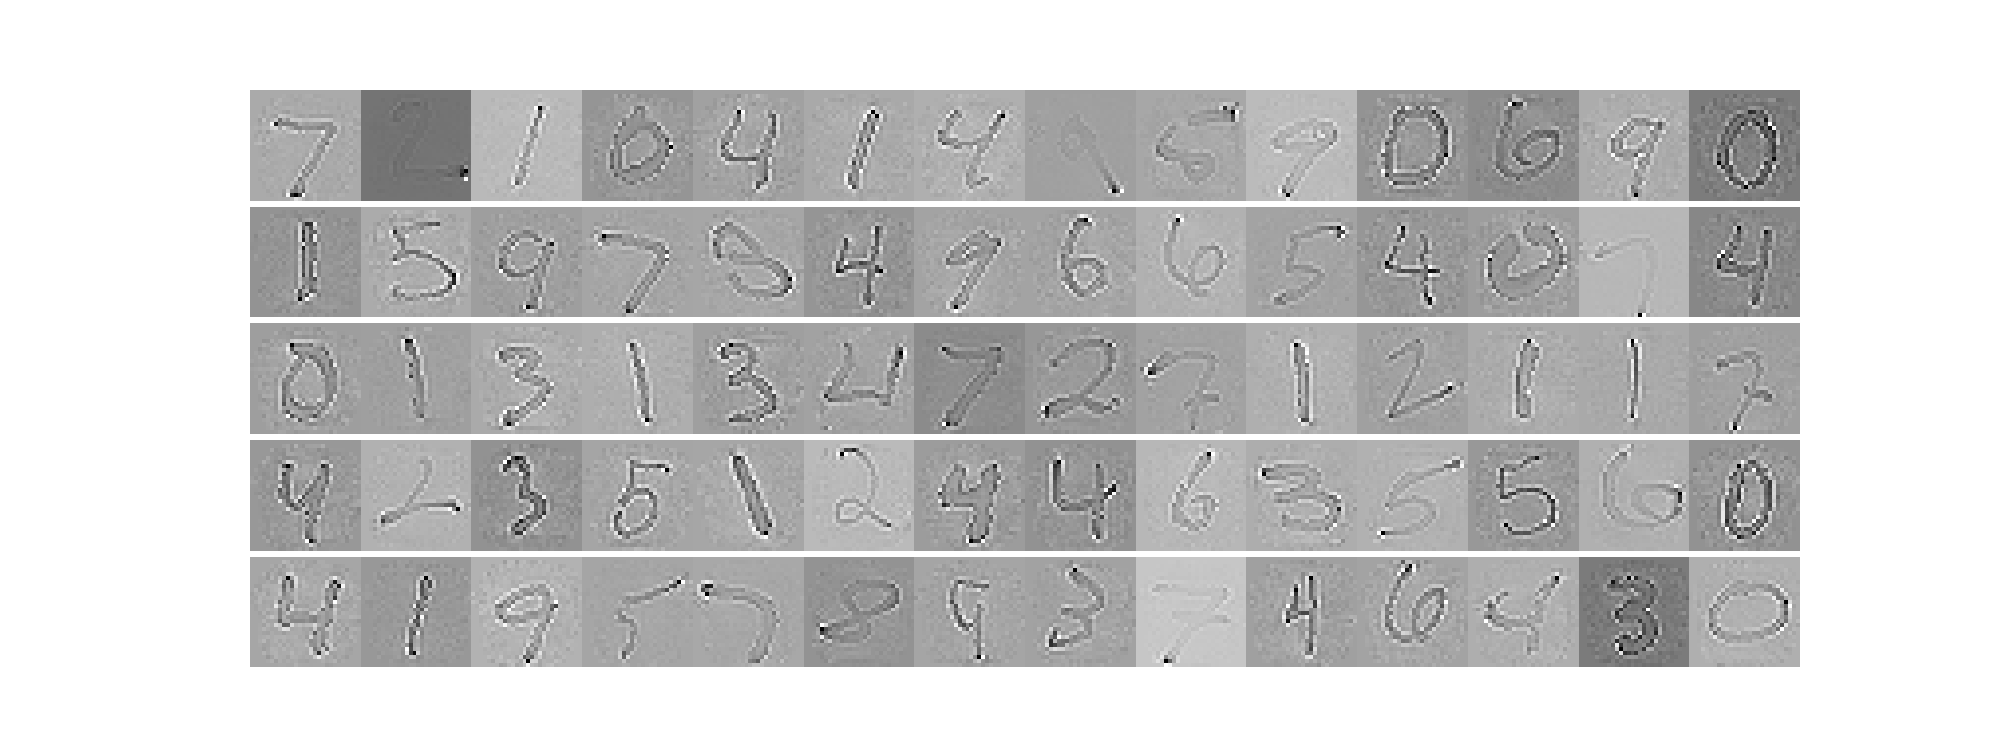

In [27]:
# plot ZCA-sphered data
show_images(Z)

# Random image patches

In [32]:
# load in dataset
data = np.loadtxt('image_patches.csv',delimiter = ',')

# divy up data into images and labels
patches = data.T

In [69]:
# mean-center the data
X = unsuplib.PCA_functionality.contrast_normalize(patches)

828 images of 130000 imagses found to be constant, and so were removed


In [70]:
# ZCA sphere data
W,S,Z = unsuplib.PCA_functionality.ZCA_sphere(X,lam = 10**(-7))

<IPython.core.display.Javascript object>


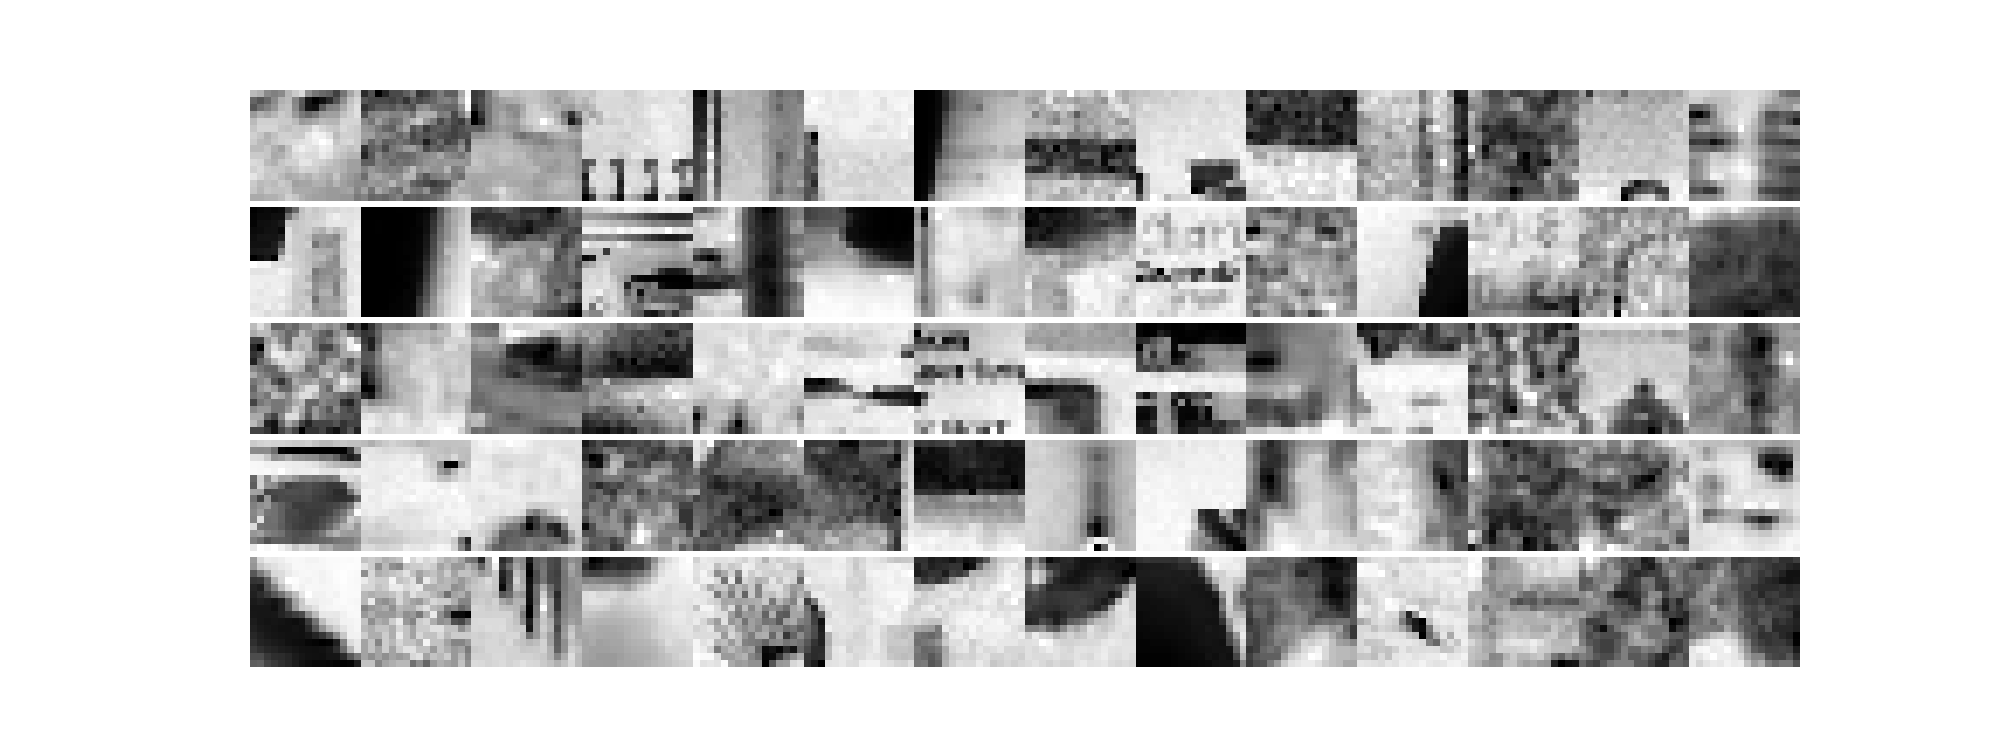

In [63]:
show_images(X)

<IPython.core.display.Javascript object>


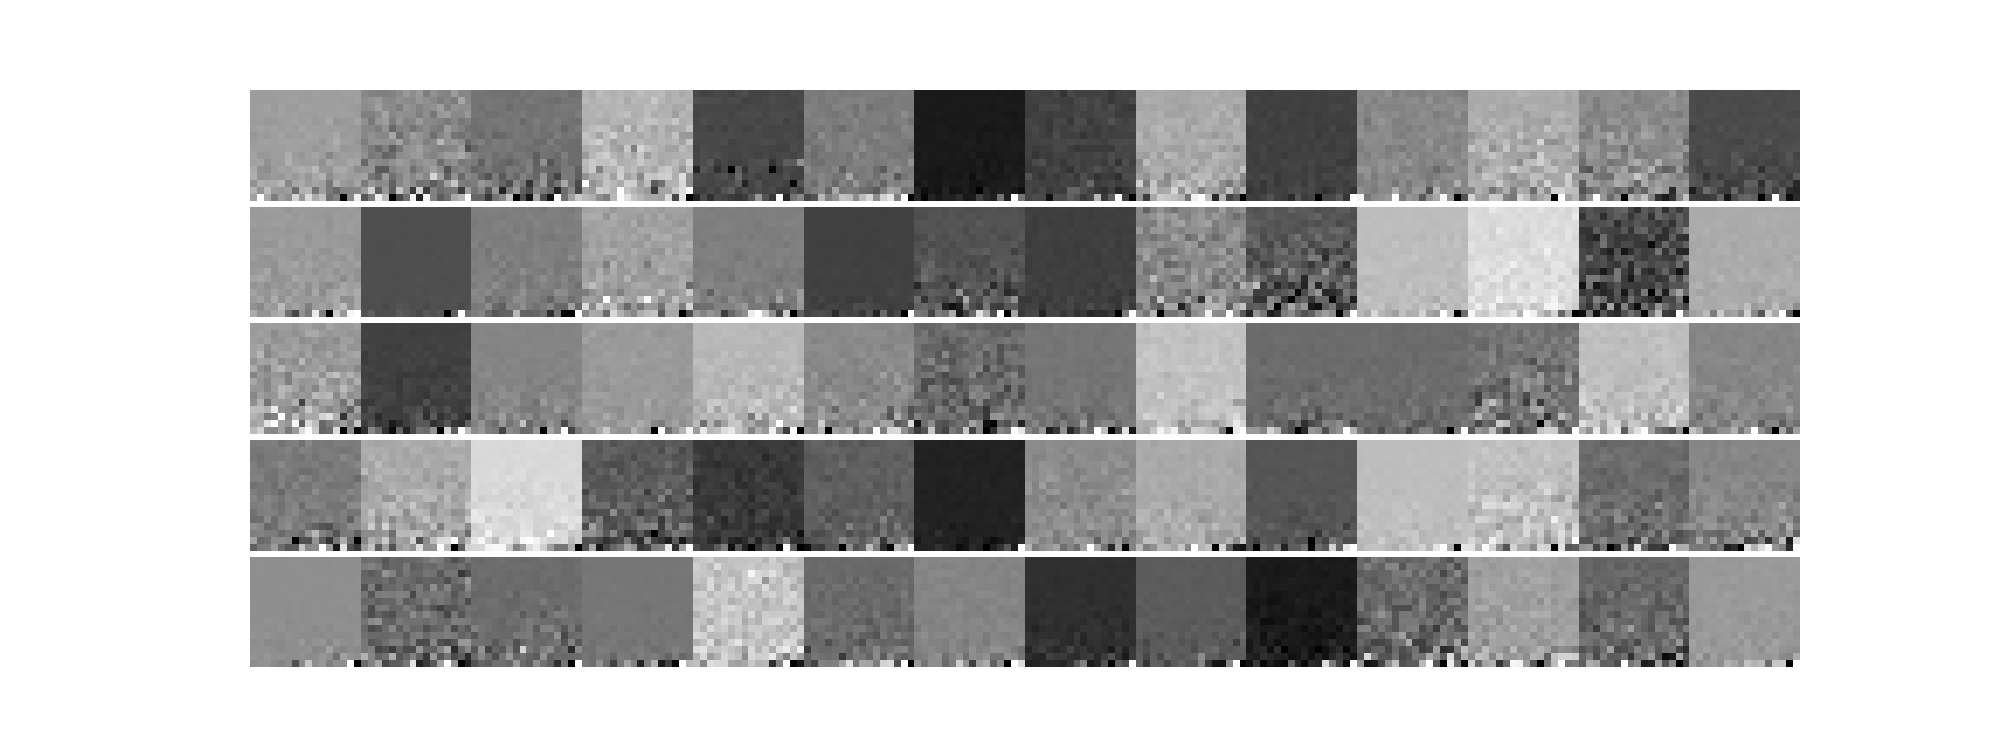

In [73]:
show_images(W)

<IPython.core.display.Javascript object>


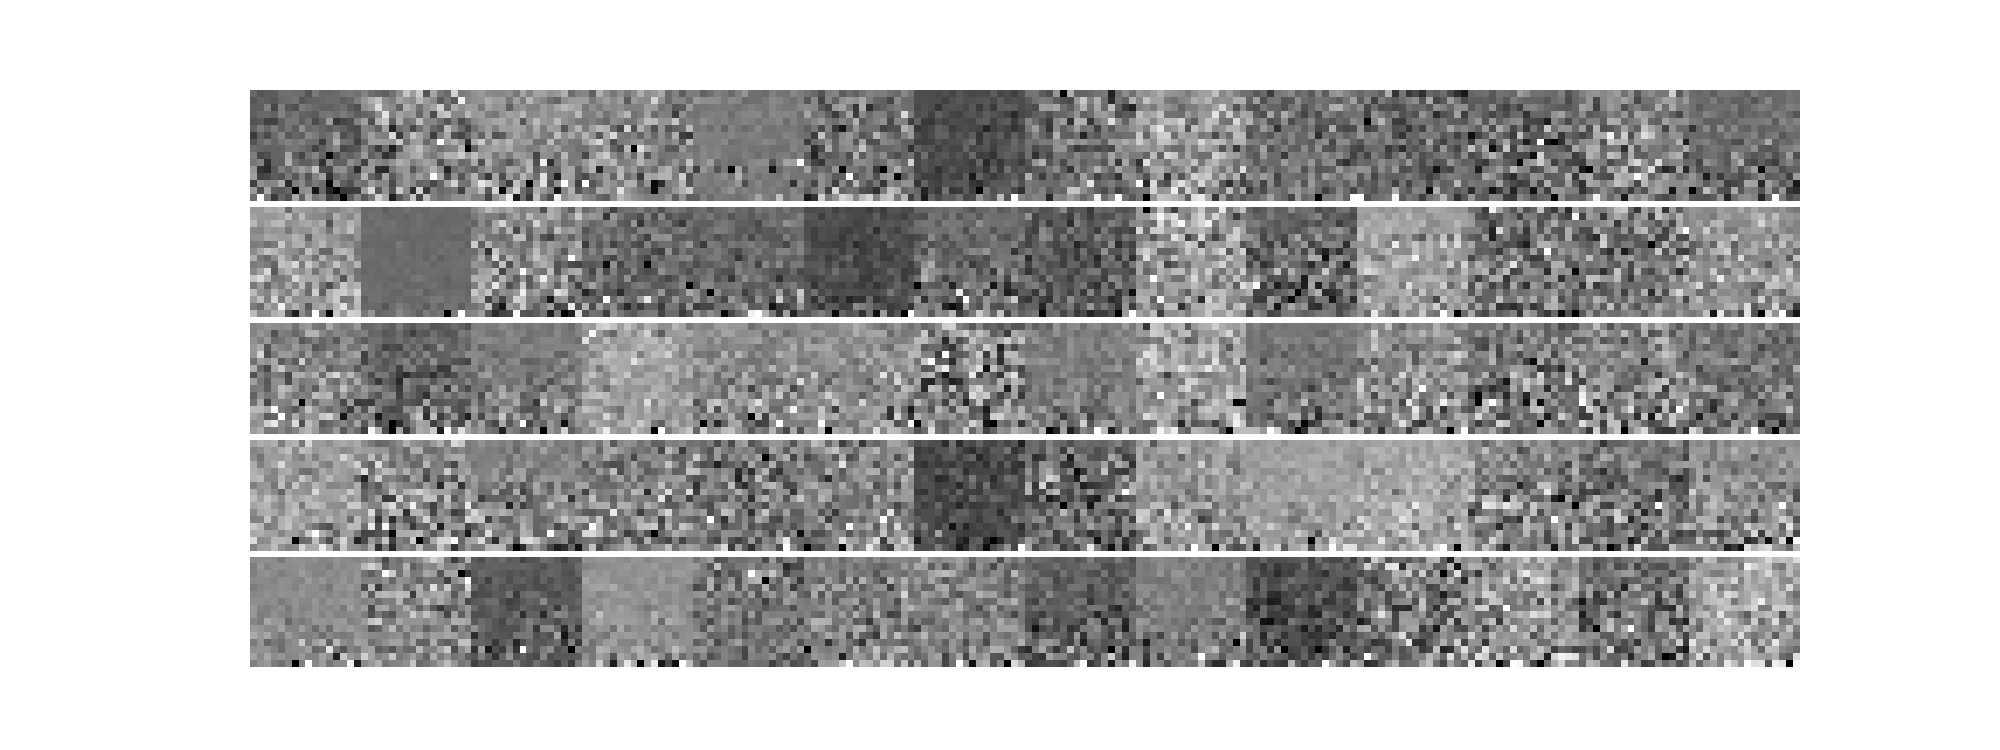

In [74]:
show_images(S)

<IPython.core.display.Javascript object>


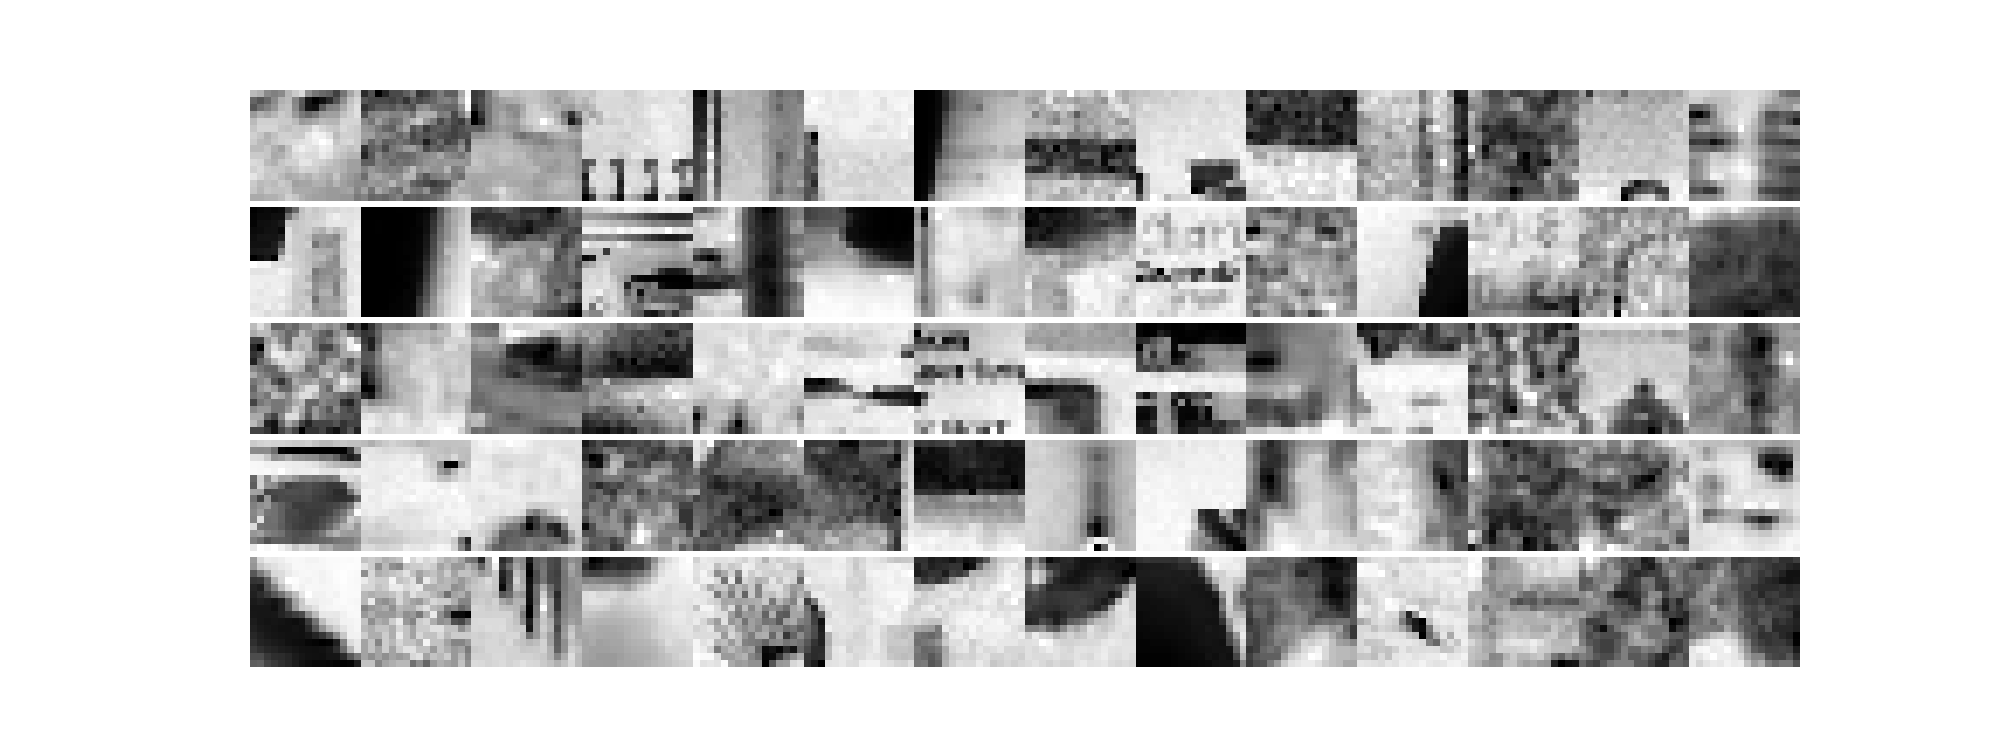

In [85]:
show_images(X)

Perform K-means

In [82]:
# perform K-means clustering
num_clusters = 200       # number of clusters
clusterer = KMeans(n_clusters=num_clusters,max_iter = 2000,n_init = 1)

# fit the algorithm to our dataset
clusterer.fit(Z.T)

# cents = clusterer.cluster_centers_ # extract cluster centroids
centroids = clusterer.cluster_centers_.T

<IPython.core.display.Javascript object>


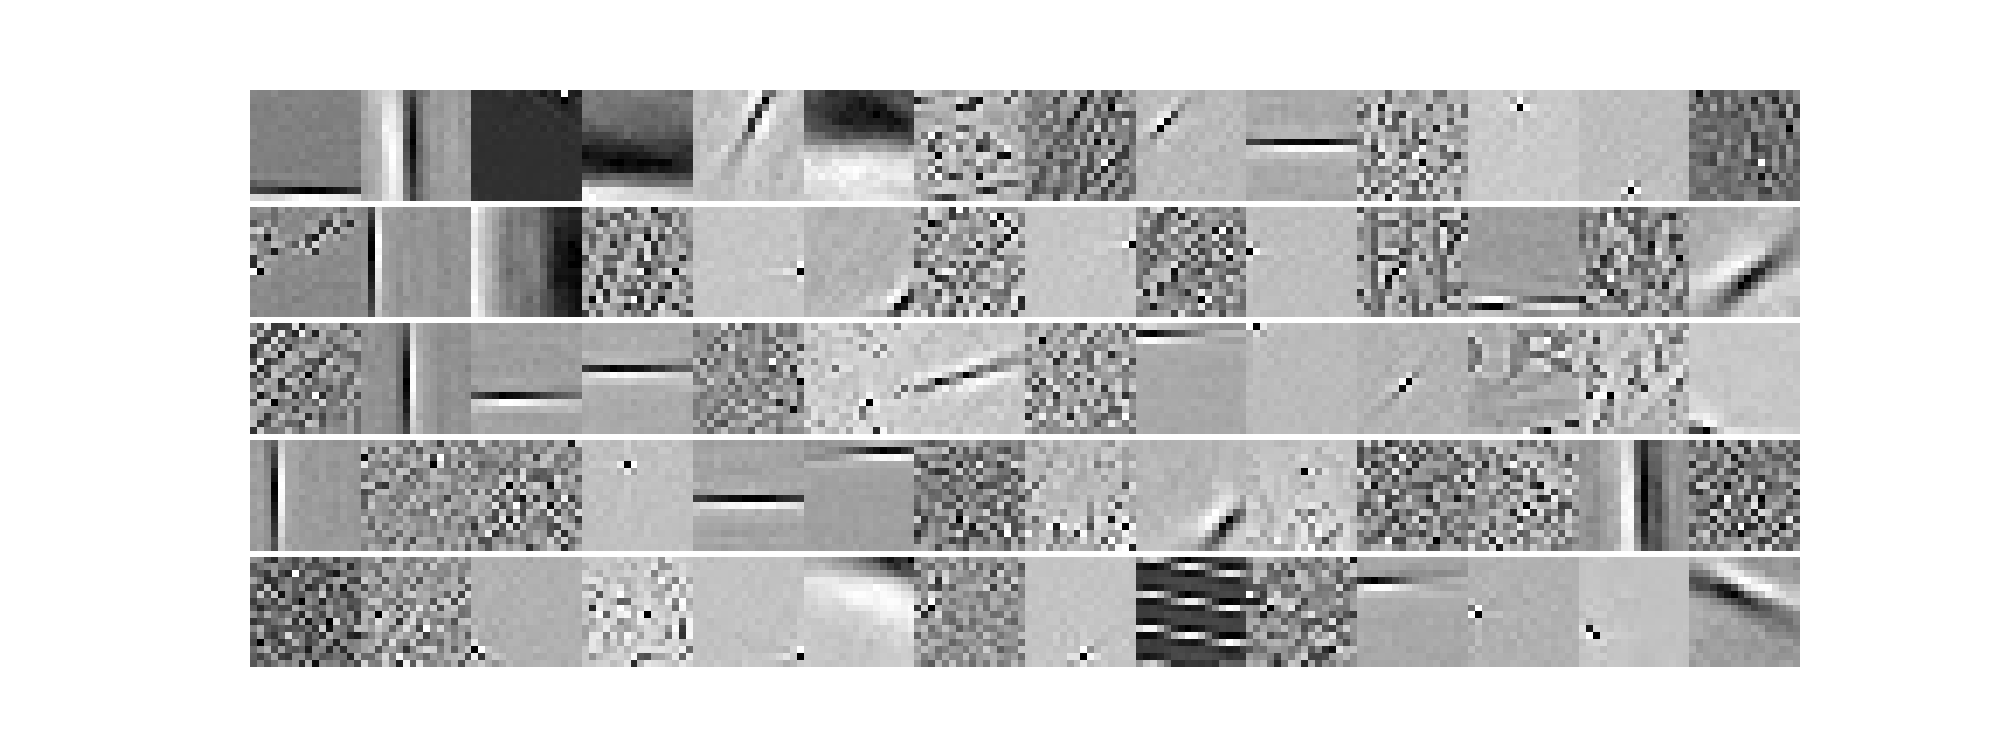

In [83]:
show_images(centroids)

In [78]:
centroids.shape

(256, 100)